Saving IMAGE OF LAB 05 .webp to IMAGE OF LAB 05  (1).webp


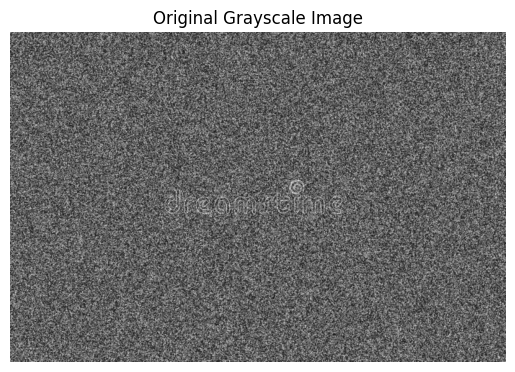

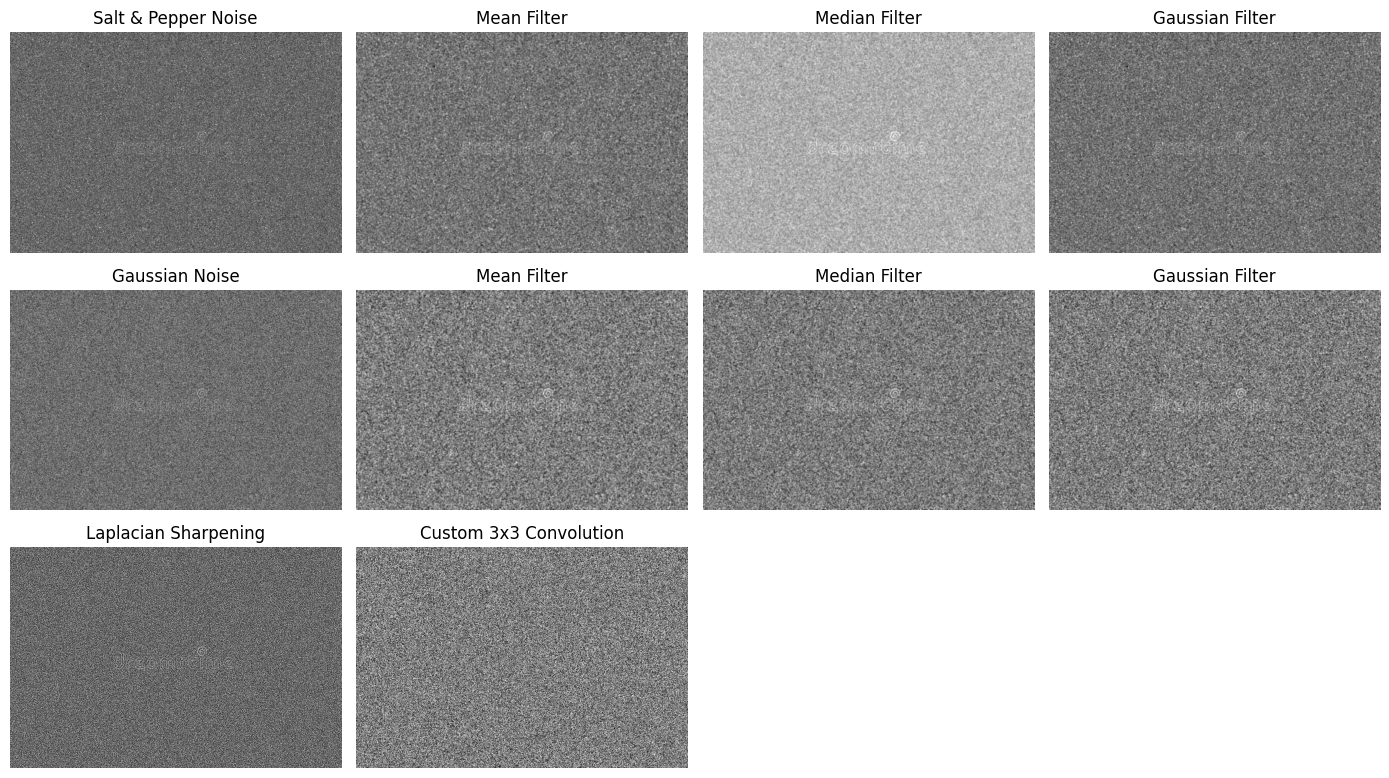

FINAL ANALYSIS:
• Median Filter is best for Salt & Pepper noise.
• Gaussian Filter is best for Gaussian noise.
• Mean Filter removes noise but causes blurring.
• Laplacian enhances edges but increases noise.
• Custom convolution highlights edges effectively.


In [2]:
# LAB 5: Spatial Filtering & Convolution
# Digital Image Processing

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from google.colab import files

# -------------------------------
# 1. Upload and Read Image
# -------------------------------
uploaded = files.upload()
img_name = list(uploaded.keys())[0]

img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

# -------------------------------
# 2. Add Noise
# -------------------------------

# Salt & Pepper Noise
def salt_pepper(img, amount=0.05):
    noisy = img.copy()
    total = int(amount * img.size)

    for i in range(total):
        x = np.random.randint(0, img.shape[0])
        y = np.random.randint(0, img.shape[1])
        noisy[x, y] = 255 if np.random.rand() < 0.5 else 0
    return noisy

# Gaussian Noise
def gaussian_noise(img, mean=0, var=25):
    noise = np.random.normal(mean, var, img.shape)
    noisy = img + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

sp_img = salt_pepper(img)
gauss_img = gaussian_noise(img)

# -------------------------------
# 3. Apply Filters
# -------------------------------

# Mean Filter
mean_sp = cv2.blur(sp_img, (3,3))
mean_gauss = cv2.blur(gauss_img, (3,3))

# Median Filter
median_sp = cv2.medianBlur(sp_img, 3)
median_gauss = cv2.medianBlur(gauss_img, 3)

# Gaussian Filter
gaussian_sp = cv2.GaussianBlur(sp_img, (3,3), 0)
gaussian_gauss = cv2.GaussianBlur(gauss_img, (3,3), 0)

# -------------------------------
# 4. Laplacian Sharpening
# -------------------------------
lap = cv2.Laplacian(img, cv2.CV_64F)
laplacian_sharp = cv2.convertScaleAbs(img - lap)

# -------------------------------
# 5. Custom 3×3 Convolution
# -------------------------------
kernel = np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]])

custom_conv = ndimage.convolve(img, kernel)

# -------------------------------
# 6. Display Results
# -------------------------------
titles = [
    "Salt & Pepper Noise", "Mean Filter", "Median Filter", "Gaussian Filter",
    "Gaussian Noise", "Mean Filter", "Median Filter", "Gaussian Filter",
    "Laplacian Sharpening", "Custom 3x3 Convolution"
]

images = [
    sp_img, mean_sp, median_sp, gaussian_sp,
    gauss_img, mean_gauss, median_gauss, gaussian_gauss,
    laplacian_sharp, custom_conv
]

plt.figure(figsize=(14,8))
for i in range(len(images)):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# -------------------------------
# 7. Final Analysis
# -------------------------------
print("FINAL ANALYSIS:")
print("• Median Filter is best for Salt & Pepper noise.")
print("• Gaussian Filter is best for Gaussian noise.")
print("• Mean Filter removes noise but causes blurring.")
print("• Laplacian enhances edges but increases noise.")
print("• Custom convolution highlights edges effectively.")